### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Identifies clusters as dense regions separated by regions of lower density and marks outliers as noise

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv("../../Datasets/Mall_Customers.csv")
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [3]:
df = df.rename(columns={
    "Annual Income (k$)":"AnnualIncome",
    "Spending Score (1-100)": "SpendingScore"
})

In [4]:
print(f"DATATYPES:\n{df.dtypes}\n")
print(f"NULLS:\n{df.isnull().sum()}")
display(df.describe())

DATATYPES:
CustomerID        int64
Gender           object
Age               int64
AnnualIncome      int64
SpendingScore     int64
dtype: object

NULLS:
CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df = df.drop("CustomerID", axis=1)

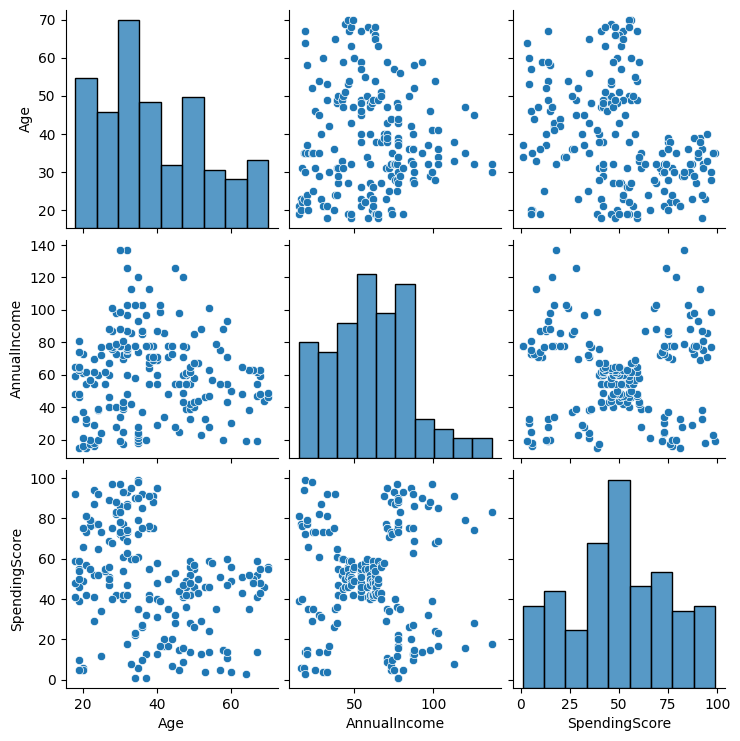

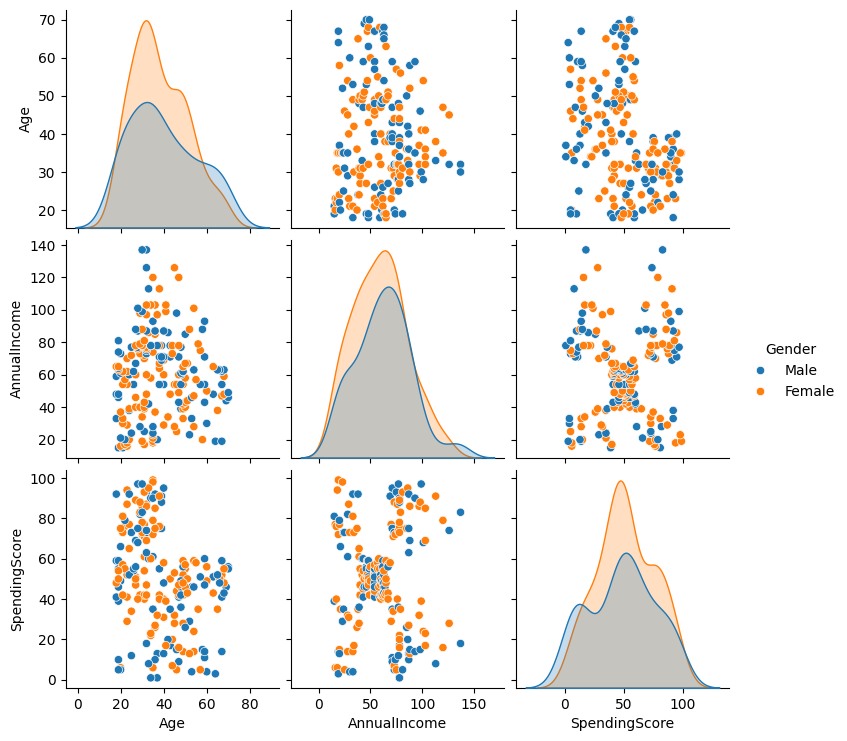

In [6]:
sns.pairplot(df)
plt.show()
sns.pairplot(df, diag_kind="kde", hue="Gender")
plt.show()

In [7]:
df_gender_dummies = pd.get_dummies(df.Gender).astype(int)
df = pd.merge(df, df_gender_dummies, left_index=True, right_index=True)

In [8]:
X = df[["Age", "AnnualIncome", "SpendingScore", "Female"]]
X.head()

,Age,AnnualIncome,SpendingScore,Female
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
for eps in np.arange(0.1, 5, 0.1):
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X_scaled)
    if len(set(labels)) > 1 and len(set(labels)) < len(X_scaled):
        score = silhouette_score(X_scaled, labels)
        print(f"eps: {eps:.2f}, silhouette score: {score:.4f}, clusters: {len(set(labels)) - (1 if -1 in labels else 0)}")

eps: 0.30, silhouette score: -0.0986, clusters: 1
eps: 0.40, silhouette score: -0.2053, clusters: 4
eps: 0.50, silhouette score: 0.0120, clusters: 9
eps: 0.60, silhouette score: 0.0938, clusters: 9
eps: 0.70, silhouette score: 0.1419, clusters: 7
eps: 0.80, silhouette score: 0.1721, clusters: 5
eps: 0.90, silhouette score: 0.2544, clusters: 2
eps: 1.00, silhouette score: 0.2544, clusters: 2
eps: 1.10, silhouette score: 0.2550, clusters: 2
eps: 1.20, silhouette score: 0.2347, clusters: 2
eps: 1.30, silhouette score: 0.2347, clusters: 2
eps: 1.40, silhouette score: 0.2347, clusters: 2
eps: 1.50, silhouette score: 0.2776, clusters: 2
eps: 1.60, silhouette score: 0.2776, clusters: 2
eps: 1.70, silhouette score: 0.2776, clusters: 2
eps: 1.80, silhouette score: 0.2776, clusters: 2
eps: 1.90, silhouette score: 0.2776, clusters: 2
eps: 2.00, silhouette score: 0.2776, clusters: 2


In [11]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)
df["Label"] = labels
df

,Gender,Age,AnnualIncome,SpendingScore,Female,Male,Label
0,Male,19,15,39,0,1,-1
1,Male,21,15,81,0,1,-1
2,Female,20,16,6,1,0,-1
3,Female,23,16,77,1,0,0
4,Female,31,17,40,1,0,-1
...,...,...,...,...,...,...,...
195,Female,35,120,79,1,0,-1
196,Female,45,126,28,1,0,-1
197,Male,32,126,74,0,1,-1
198,Male,32,137,18,0,1,-1


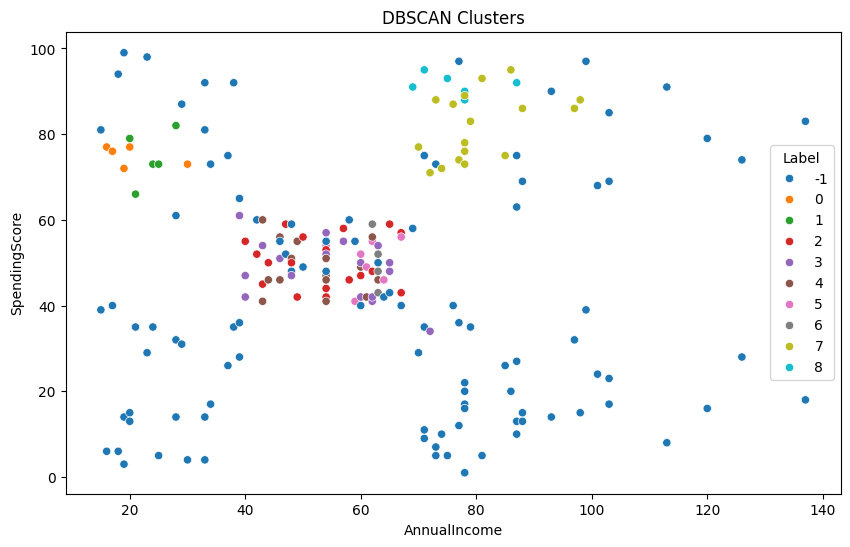

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="AnnualIncome", y="SpendingScore", hue="Label", palette="tab10")
plt.title("DBSCAN Clusters")
plt.show()